# How much of a species pangenome is in a metagenome? 
- Are all hashes of a species pangenome in metagenomes?
- Are there any hashes in all pig gut metaG (or most) and therefore pig specific
- Host specific hashes cannot also be core hashes. 
- Are there hashes that are always there? Ones that are sparsely populated?


### Makes:
- histogram of distribution of hash sharing across metagenomes
- pie chart of hash sharing between metagenomes (hardcoded though)


In [ ]:
# imports
import pandas as pd
import matplotlib.pyplot as plt


: 

In [2]:
# take e. coli output as example
# df of [hashvalue, num_counts] (out of 3216 metagenomes)
df = pd.read_csv('../data/Escherichia_coli.hashval_counts.csv')
print("num hashes found:", len(df))


num hashes found: 246438


In [3]:
df_total_hashes = pd.read_csv('../data/250910_total_hashes_pangenome.csv')
df_total_hashes

,species,total_hashes
0,Escherichia coli,555227
1,Limosilactobacillus reuteri,29984
2,Sodaliphilus sp004557565,41659
3,Prevotella sp000434975,35255
4,Lactobacillus amylovorus,29451
5,Collinsella sp002391315,17480
6,Prevotella pectinovora,23081
7,Prevotella sp002251295,31823
8,Cryptobacteroides sp900546925,22680
9,UBA2868 sp004552595,25408


In [4]:
# total hashes in e.coli = 555228
# so only 44% shows up in pig
(246422/555228)*100

44.38212770249339

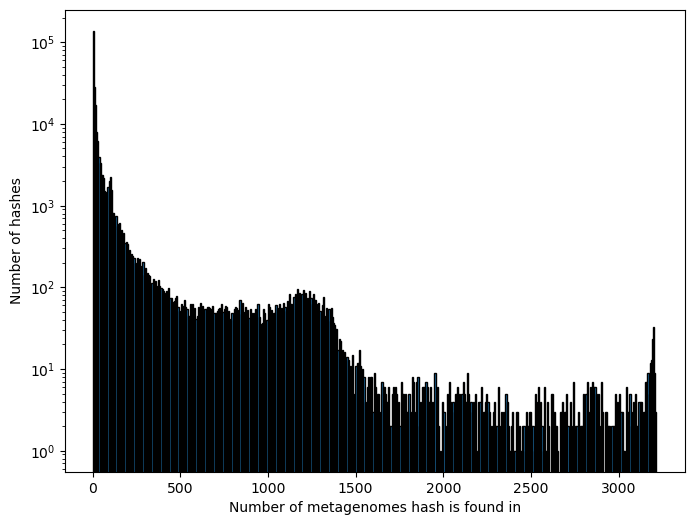

In [5]:
# plot histogram of hashes
df['count_1s'].plot.hist(bins=500, edgecolor="black", figsize=(8,6))
plt.xlabel("Number of metagenomes hash is found in")
plt.ylabel("Number of hashes")
plt.yscale("log")
#plt.savefig('../plots/250908_hashes_Ecoli_inpig_over1000.png')

## pie chart
- What would we consider a core pig hash? 
- Everything in > 2500? Thats ~75% of the metaGs, would say that is a majority
- Can try multiple things.. 

In [6]:
#df_total_hashes.head()

In [7]:
# functions
# plot bc i like a visual
def plot_binned_pie(binned_df):
    plt.figure(figsize=(7,7))
    plt.pie(
        binned_df["value"],
        labels=binned_df["count_bin"],
        autopct=lambda p: f"{p:.1f}%\n({int(p*sum(binned_df['value'])/100)})",
        startangle=90
    )
    plt.title("Hash distribution across bins")
    plt.tight_layout()
    plt.show()

# get value counts for num times a hash was found
# so how many times was a hash found in n metags
def hash_count_summary(df, total, col="count_1s"):
    counts = df[col].value_counts().sort_index()

    summary = pd.DataFrame({
        "count": counts.index,
        "n_hashes": counts.values
    })

    # add absent
    absent = total - len(df)
    summary = pd.concat([
        pd.DataFrame({"count": ["Absent"], "n_hashes": [absent]}),
        summary
    ], ignore_index=True)

    return summary


# create bins from those counts
import pandas as pd
import numpy as np

def bin_hash_counts(summary_df):
    bins = [
        ("Absent", lambda x: x == "Absent"),
        ("1", lambda x: x == 1),
        ("2–10", lambda x: (x >= 2) & (x <= 10)),
        ("10–100", lambda x: (x > 10) & (x <= 100)),
        ("100–1000", lambda x: (x > 100) & (x <= 1000)),
        ("1000–2500", lambda x: (x > 1000) & (x < 2500)),
        (">=2500", lambda x: x >= 2500),
    ]

    results = []
    for label, condition in bins:
        if label == "Absent":
            val = summary_df.loc[summary_df["count"] == "Absent", "n_hashes"].sum()
        else:
            # numeric filtering
            numeric_counts = summary_df[summary_df["count"].apply(lambda c: isinstance(c, (int, np.integer)))]
            val = numeric_counts.loc[condition(numeric_counts["count"]), "n_hashes"].sum()
        results.append({"count_bin": label, "value": val})

    return pd.DataFrame(results)


In [8]:
summary_df = hash_count_summary(df, total=555228, col="count_1s")
binned_df = bin_hash_counts(summary_df)
binned_df['percent'] = (binned_df['value']/555228)*100

In [9]:
binned_df

,count_bin,value,percent
0,Absent,308790,55.614991
1,1,46247,8.329371
2,2–10,108651,19.568718
3,10–100,66073,11.900156
4,100–1000,20511,3.694158
5,1000–2500,4542,0.818042
6,>=2500,414,0.074564


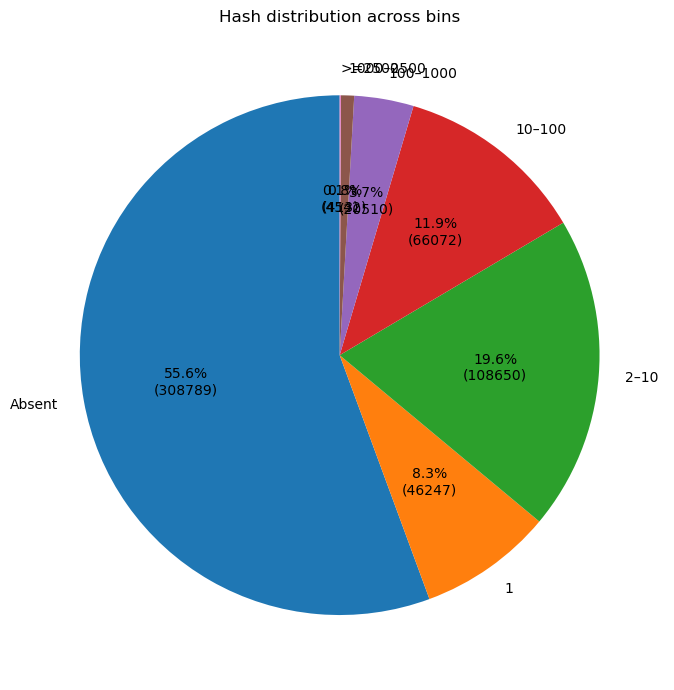

In [10]:
plot_binned_pie(binned_df)